In [2]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
sweeper = Sweeper.from_jsonfile("config-fmn2.json", log_dir="logs_fmn2")

In [4]:
sweeper.config_df

,dataset,norm,attack,model,binary_search_steps,loss_f,steps,α_final,α_init,γ_final,γ_init
0,CIFAR10,L2,fmn2,Augustin2020Adversarial_34_10_extra,10,DL,100,0.0001,1,0.001,0.05
1,CIFAR10,L2,fmn2,Augustin2020Adversarial_34_10_extra,10,DL,100,0.0001,5,0.001,0.05
2,CIFAR10,L2,fmn2,Augustin2020Adversarial_34_10_extra,10,DL,100,0.0001,10,0.001,0.05
3,CIFAR10,L2,fmn2,Engstrom2019Robustness_l2,10,DL,100,0.0001,1,0.001,0.05
4,CIFAR10,L2,fmn2,Engstrom2019Robustness_l2,10,DL,100,0.0001,5,0.001,0.05
...,...,...,...,...,...,...,...,...,...,...,...
59,CIFAR10,Linf,fmn2,Rade2021Helper_R18_extra,10,DL,100,0.0001,1000,0.001,0.05
60,CIFAR10,Linf,fmn2,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,0.0001,1,0.001,0.05
61,CIFAR10,Linf,fmn2,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,0.0001,10,0.001,0.05
62,CIFAR10,Linf,fmn2,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,0.0001,100,0.001,0.05


In [5]:
sweeper.logger.load_all()

In [21]:
sweeper.save_df()
sweeper.sweep(n_samples=15, device=None, recompute=False, batch_size=5)
sweeper.save_df()

dataset-CIFAR10-norm-L2-attack-fmn2-model-Augustin2020Adversarial_34_10_extra-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-1-γ_final-0.001-γ_init-0.05
dataset-CIFAR10-norm-L2-attack-fmn2-model-Augustin2020Adversarial_34_10_extra-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-5-γ_final-0.001-γ_init-0.05
dataset-CIFAR10-norm-L2-attack-fmn2-model-Augustin2020Adversarial_34_10_extra-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-10-γ_final-0.001-γ_init-0.05
dataset-CIFAR10-norm-L2-attack-fmn2-model-Engstrom2019Robustness_l2-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-1-γ_final-0.001-γ_init-0.05
dataset-CIFAR10-norm-L2-attack-fmn2-model-Engstrom2019Robustness_l2-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-5-γ_final-0.001-γ_init-0.05
dataset-CIFAR10-norm-L2-attack-fmn2-model-Engstrom2019Robustness_l2-binary_search_steps-10-loss_f-DL-steps-100-α_final-0.0001-α_init-10-γ_final-0.001-γ_init-0.05
da

  0%|          | 0/3 [00:00<?, ?it/s]

tensor([[4, 3, 2],
        [3, 7, 6],
        [2, 4, 8],
        [4, 3, 9],
        [7, 9, 1]])
ah tensor([4, 3, 2, 4, 7])
tensor([-0.2269, -1.0766, -4.9871, -4.9597, -4.5405], grad_fn=<SubBackward0>) l
tensor([ 0.0543,  0.2146, 13.1081,  5.4615, 10.3661]) init
tensor([0.0551, 0.2691,    inf, 2.2827,    inf]) refined
ah tensor([3, 7, 4, 3, 9])
tensor([-3.1826, -3.3807, -4.9985, -4.9635, -4.6742], grad_fn=<SubBackward0>) l
tensor([ 1.0869,  0.9642,  8.8283,  8.9952, 18.1340]) init


  0%|          | 0/3 [01:15<?, ?it/s]


KeyboardInterrupt: 

In [66]:
# sweeper.logger.where(model="Maini2020MultipleAVG")

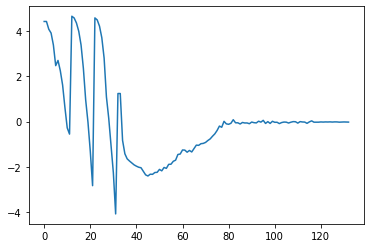

In [9]:
sweeper.logger.plot_progress(kind="loss", run_id=[*sweeper.logger.dict.keys()][0])

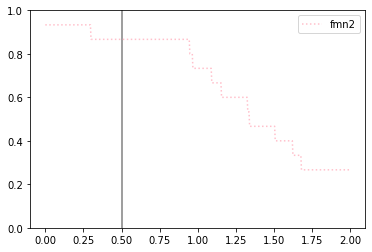

In [12]:
sweeper.logger.plot_SE(run_id=[*sweeper.logger.dict.keys()][0])


In [117]:
settings = {"attack":"", "model":""}

In [120]:
import matplotlib.pyplot as plt

# todo - put this into functions in some plot_utils file
# tofo - support filtering/splitting into multiple plots (e.g. plot only one model)

plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_QD(key)
    keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel(settings["norm"])
plt.xlabel("Query")
plt.xscale('log')
None

In [ ]:
plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="loss", run_id=key)
    keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("DL Loss")
plt.xlabel("Query")
None

In [ ]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="acc", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("Accuracy")
plt.xlabel("Query")
None